In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/yv/b_d3lh0x62sf4n5wmgw2xzbh0000gn/T/ipykernel_28485/2639776237.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [12]:
# View all of the classes that automap found
Base.classes.keys()

[]

In [19]:
# Save references to each table
#################################################
# Database Setup
#################################################
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Connect to the database
engine = create_engine("sqlite:///hawaii.sqlite")

# Verify tables exist
inspector = inspect(engine)
tables = inspector.get_table_names()
print("Tables in the database:", tables)  # Debug output

# Reflect tables
Base = automap_base()
Base.prepare(autoload_with=engine)

# Use the EXACT table names from inspector.get_table_names()
Measurement = Base.classes.measurement  # Singular
Station = Base.classes.station  # Singular

# Create a session
session = Session(engine)


Tables in the database: ['measurement', 'station']


In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# Save references to each table
#################################################
# Database Setup
#################################################
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Connect to the database
engine = create_engine("sqlite:///hawaii.sqlite")

# Verify tables exist
inspector = inspect(engine)
tables = inspector.get_table_names()
print("Tables in the database:", tables)  # Debug output

# Reflect tables
Base = automap_base()
Base.prepare(autoload_with=engine)

# Use the EXACT table names from inspector.get_table_names()
Measurement = Base.classes.measurement  # Singular
Station = Base.classes.station  # Singular

# Create a session
session = Session(engine)


Tables in the database: ['measurement', 'station']


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).scalar()
print(f"Most recent date: {latest_date}")

Most recent date: 2017-08-23


One year from most recent date: 2016-08-23


<Figure size 1000x500 with 0 Axes>

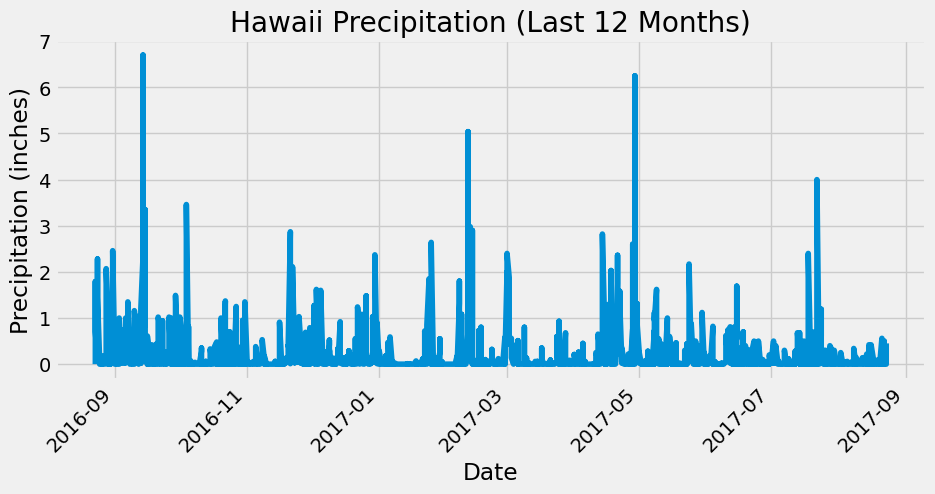

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
latest_date_dt = dt.datetime.strptime(latest_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_ago = latest_date_dt - dt.timedelta(days=365)
print(f"One year from most recent date: {one_year_ago.strftime('%Y-%m-%d')}")

# Perform a query to retrieve the data and precipitation scores
precipitation_data = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= one_year_ago.strftime("%Y-%m-%d"))
    .order_by(Measurement.date)
    .all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Drop NaN values
precip_df = precip_df.dropna()

# Convert date column to datetime format for proper plotting
precip_df['date'] = pd.to_datetime(precip_df['date'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 5))
precip_df.plot(x='date', y='precipitation', legend=False, figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Hawaii Precipitation (Last 12 Months)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_summary = precip_df.describe()
precip_summary


,date,precipitation
count,2021,2021.000000
mean,2017-02-16 08:55:06.086095872,0.177279
min,2016-08-23 00:00:00,0.000000
25%,2016-11-17 00:00:00,0.000000
50%,2017-02-14 00:00:00,0.020000
75%,2017-05-17 00:00:00,0.130000
max,2017-08-23 00:00:00,6.700000
std,NaN,0.461190


# Exploratory Station Analysis

In [13]:
total_stations = session.query(func.count(Station.station)).scalar()
total_stations



9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]  # Extracts the station ID with the most observations

# Query to calculate the lowest, highest, and average temperature for the most active station
temp_stats = (
    session.query(
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs)
    )
    .filter(Measurement.station == most_active_station)
    .all()
)

# Extract results
temp_stats[0] 

(54.0, 71.66378066378067, 85.0)

<Figure size 800x600 with 0 Axes>

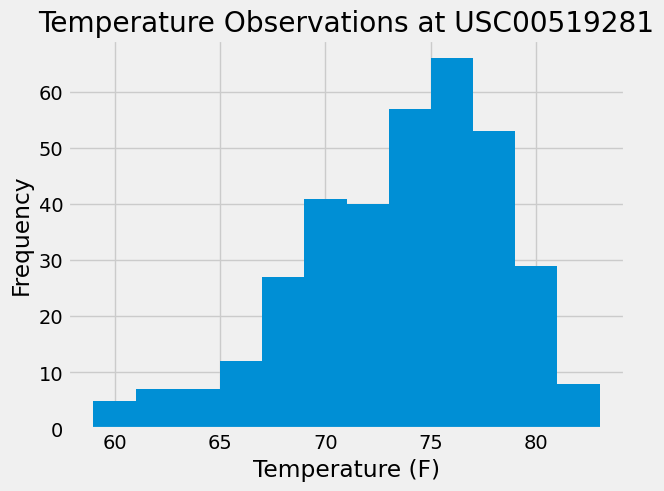

In [16]:
# Using the most active station id
most_active_station = active_stations[0][0] 
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = (
    session.query(
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs)
    )
    .filter(Measurement.station == most_active_station)
    .all()
)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station)
    .filter(Measurement.date >= one_year_ago.strftime("%Y-%m-%d"))
    .all()
)

# Convert query results to a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])

# Plot the histogram
plt.figure(figsize=(8, 6))
tobs_df.plot.hist(bins=12, legend=False)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations at {most_active_station}')
plt.grid(True)

# Show the plot
plt.show()


# Close Session

In [21]:
# Close Session
session.close()
